Implement a KNN model to classify the animals in to categories.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import the dataset 
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [7]:
#check shape of dataset
zoo.shape

(101, 18)

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
#checking missing values
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

There is no missing values found in dataset.

In [10]:
#Generate descriptive statistics
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
zoo['animal name'].value_counts()#nunique()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [12]:
zoo['animal name'].nunique()

100

In [13]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


No duplicated rows found.

# Correlation Analysis & Visualization

In [15]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<AxesSubplot:>

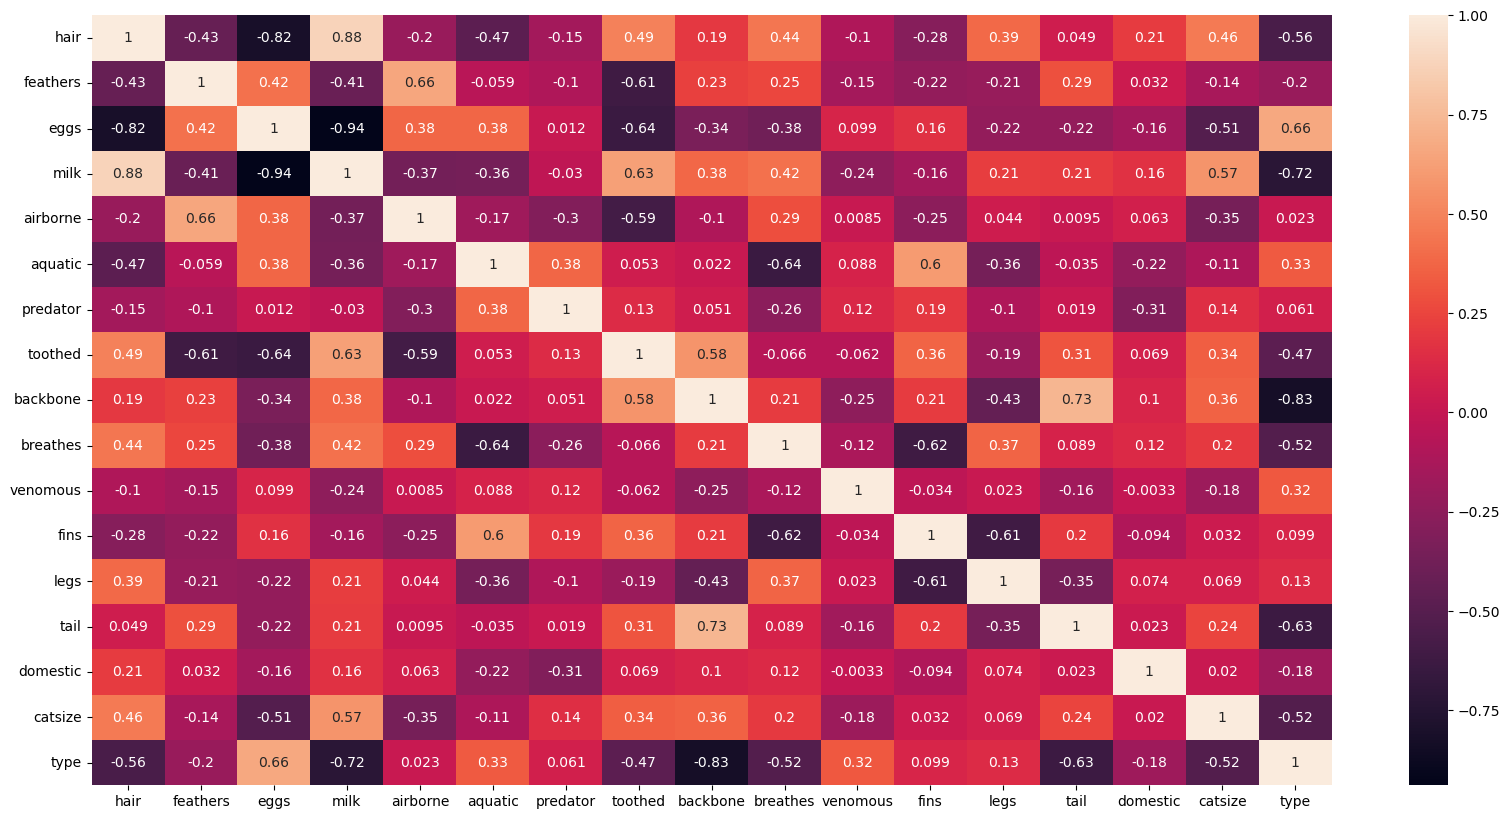

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(zoo.corr(),annot=True,xticklabels=True)

#### Countplot Show the counts of observations of animals classification in each categorical bin using bars.

<AxesSubplot:xlabel='type', ylabel='count'>

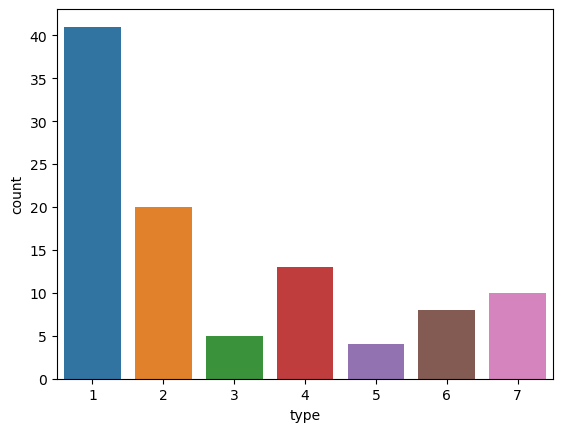

In [17]:
#plot countplot to summarize the animal types
sns.countplot(zoo['type'],label='Count')

#### The animalas are classsified into 7 types.

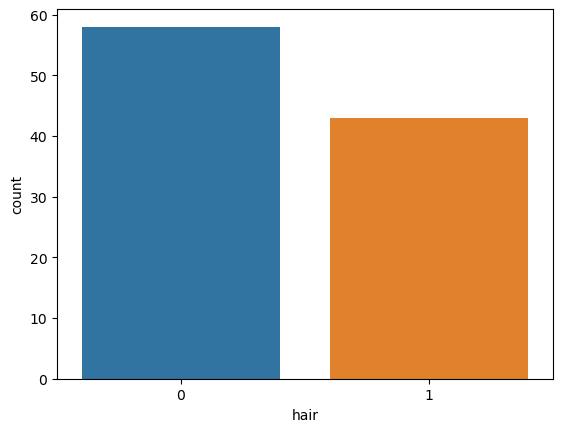

0    58
1    43
Name: hair, dtype: int64

In [18]:
sns.countplot(x='hair',data=zoo)
plt.xlabel='Hair'
plt.ylabel='Count'
plt.show()
zoo.loc[:,'hair'].value_counts()

so we can conclude that the count of animals with hairs is more.

In [19]:
#so we can conclude that the count of animals with hairs is more.
zoo['feathers'].value_counts()

0    81
1    20
Name: feathers, dtype: int64

There are total 20 animals in the zoo who have feathers.

In [20]:
#Let's check how many animals give eggs
zoo['eggs'].value_counts()

1    59
0    42
Name: eggs, dtype: int64

There are 59 oviparous animals in the zoo.

In [21]:
#Let's check how many animals are predator
zoo['predator'].value_counts()

1    56
0    45
Name: predator, dtype: int64

There are 56 animals in zoo are predator.

In [22]:
#Let's check how many animals are venomous
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

Only 8 animals in zoo are venomous.

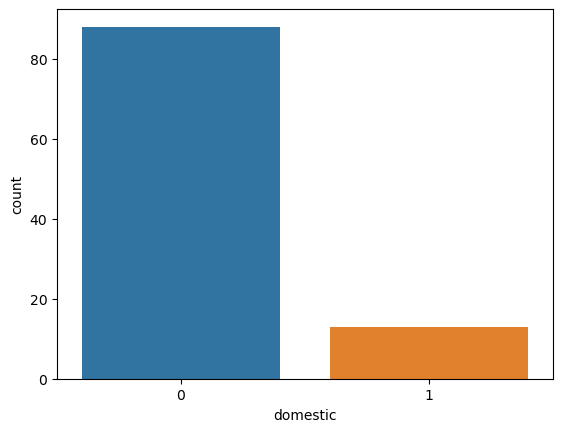

0    88
1    13
Name: domestic, dtype: int64

In [23]:
#Lets plot countplot to know how many animals are domestic or not
sns.countplot(x='domestic',data=zoo)
plt.xlabel='Domestic'
plt.ylabel='Count'
plt.show()
zoo.loc[:,'domestic'].value_counts()

So above countplot we can say that majority of animals in dataset are not domestic animals.

In [25]:
#lets see classwise domestic & non-domestic count of animals
pd.crosstab(zoo['type'],zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


<AxesSubplot:title={'center':'Classwise Domestic & Non-domestic count'}, xlabel='type'>

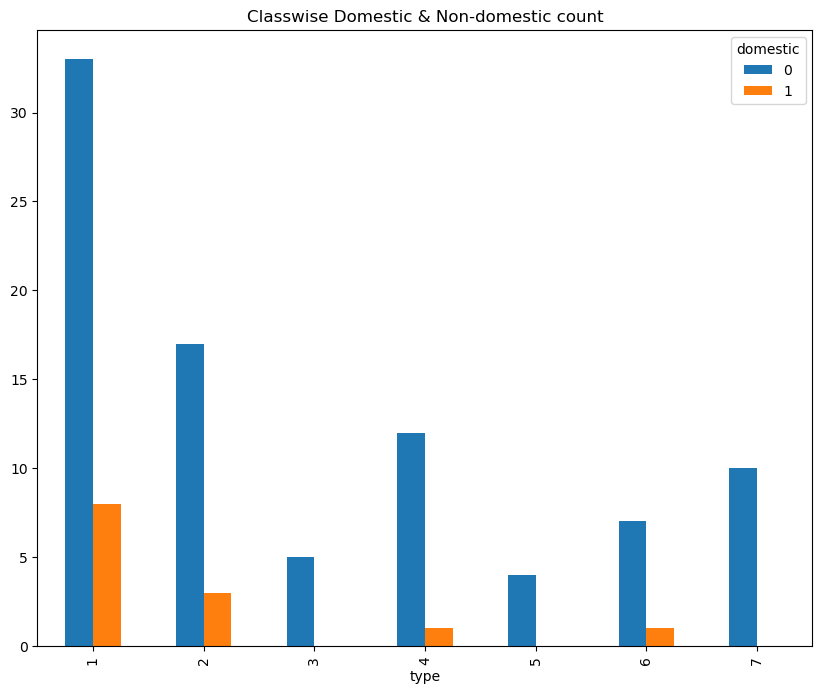

In [27]:
#visualize classwise domestic & non-domestic count of animals
pd.crosstab(zoo['type'],zoo['domestic']).plot(kind='bar',figsize=(10,8),title='Classwise Domestic & Non-domestic count')

#### Above plot we conclude that In types 3,5 & 7 we only have non-domestic animals.

In [28]:
#Let's check how many animals give milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

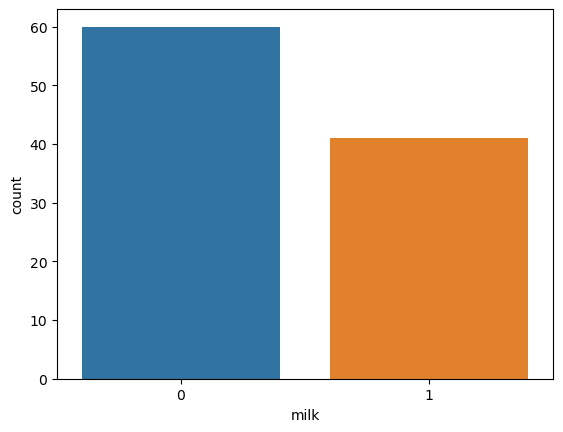

In [29]:
#Lets plot countplot to know how many animals give milk or not
sns.countplot(x='milk',data=zoo)
plt.xlabel='Milk'
plt.ylabel='Count'
plt.show()

 41 animals in zoo are belongs to the category milk.

In [30]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
zoo.aquatic.value_counts() 
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

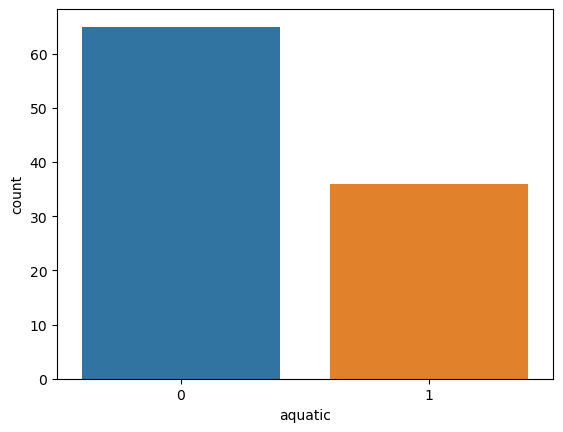

In [31]:
#Lets plot countplot to know how many animals are aquatic or not
sns.countplot(x='aquatic',data=zoo)
plt.xlabel='Aquatic'
plt.ylabel='Count'
plt.show()

 Only 36 aquatic animals are there.

# Data Pre-Processing

In [32]:
#Extracting Independent and dependent Variable  
X=zoo.iloc[:,1:16].values
y=zoo.iloc[:,16].values

Use random state while splitting the data to ensure reproducibility and consistency

In [35]:
# Splitting the dataset into training and test set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
#feature scaling
zoo_scaled=StandardScaler()
X_train=zoo_scaled.fit_transform(X_train)
X_test=zoo_scaled.transform(X_test)

In [37]:
#Fitting KNN classifier to Training dataset
model1=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
model1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [38]:
y_pred=model1.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [39]:
#creating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  3],
       [ 2, 11]], dtype=int64)

In [40]:
#Build Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.79      0.85      0.81        13

    accuracy                           0.84        31
   macro avg       0.83      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [41]:
#Check Accuracy_score
print(accuracy_score(y_test,y_pred))

0.8387096774193549


### KNN gives 83% Accuracy with randomly selected k=12 neighbors.

# Grid Search for Algorithm Tuning

In [42]:
#importing library
from sklearn.model_selection import GridSearchCV,cross_val_score

In [43]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [44]:
clf=KNeighborsClassifier()
grid=GridSearchCV(estimator=clf,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [45]:
#calculate better value for k
print(grid.best_params_)


{'n_neighbors': 5}


### Grid SearchCV Give Best value for k is 5 .

### Visualizing the CV results

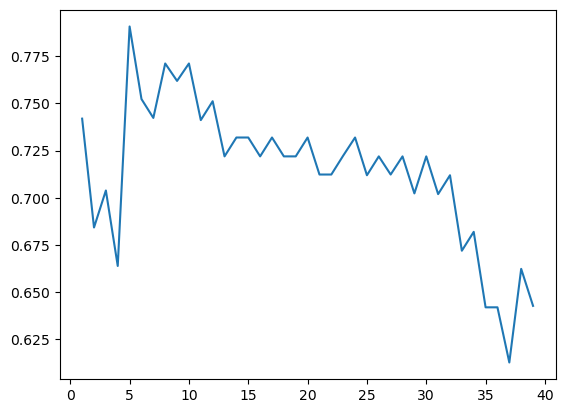

In [52]:
#choose k between 1 to 40
k_range=range(1,40)
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=4)
    k_scores.append(scores.mean())
#plot to see clearly
plt.plot(k_range,k_scores)
plt.show()    

From Above plot we can say that k=5 produces most accurate result.

### By using best value of k=5 we build KNN model.

In [53]:
model2=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [54]:
#creating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  3],
       [ 1, 12]], dtype=int64)

In [55]:
#Build Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.80      0.92      0.86        13

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



In [56]:
#Check Accuracy_score
print(accuracy_score(y_test,y_pred))

0.8709677419354839


### After applying one of the hyper parameter tuning method Grid-Search CV, Now we get Accuracy 87.09% which is better than previous model.
### The best k value found to be 5.

### Show Results

In [58]:
Results = pd.DataFrame()
Results['Name'] = zoo['animal name'].iloc[70:,]
Results['Predict_Type'] = y_pred
Results['Original_Type'] = y_test
#Results['Correct'] =test_accuracy
Results

,Name,Predict_Type,Original_Type
70,reindeer,1,0
71,rhea,1,1
72,scorpion,1,1
73,seahorse,1,1
74,seal,1,1
75,sealion,0,0
76,seasnake,1,1
77,seawasp,1,1
78,skimmer,1,1
79,skua,1,1
